In [104]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# load the data in pandas's dataframe
train_data = pd.read_csv('train_s3TEQDk.csv')
train_data.head()

# we can remove the ID column from dataframe 
# axis 0: corresponds to rows
# axis 1: corresponds to columns
train_data.drop('ID', axis = 1, inplace=True)

# segrigating the columns into category and numerical type based on value
category_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
numerical_cols = [col for col in train_data.columns if train_data[col].dtype != 'object']

# remove the field we are doing predictive analysis
numerical_cols.remove('Is_Lead')

print(category_cols)
print(numerical_cols)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
['Age', 'Vintage', 'Avg_Account_Balance']


In [105]:
# Removing null values from the dataset

train_data = train_data.dropna()


In [106]:
# Applying one-hot encoding to categorical values

category_cols_new = [col for col in category_cols if col!='Region_Code']
category_cols_new

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [107]:
train_data_encoded = pd.get_dummies(train_data[category_cols_new], drop_first=True)
train_data_encoded.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,False,True,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,True
3,True,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False


In [108]:
train_data[numerical_cols].head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [109]:
# Adding the encoded values with numerical values
train_data_encoded = pd.concat([train_data_encoded, train_data[numerical_cols]], axis = 1)
train_data_encoded.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Age,Vintage,Avg_Account_Balance
0,False,True,False,False,False,True,False,False,False,73,43,1045696
1,False,False,True,False,False,False,False,False,False,30,32,581988
2,False,False,False,True,False,True,False,False,True,56,26,1484315
3,True,False,True,False,False,False,False,False,False,34,19,470454
4,False,False,True,False,False,False,False,False,False,30,33,886787


In [110]:
# Encodeing the region code using label encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data_encoded['Region_Code'] = encoder.fit_transform(train_data['Region_Code'])
train_data_encoded.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Age,Vintage,Avg_Account_Balance,Region_Code
0,False,True,False,False,False,True,False,False,False,73,43,1045696,18
1,False,False,True,False,False,False,False,False,False,30,32,581988,27
2,False,False,False,True,False,True,False,False,True,56,26,1484315,18
3,True,False,True,False,False,False,False,False,False,34,19,470454,20
4,False,False,True,False,False,False,False,False,False,30,33,886787,32


In [111]:
# Since the data is skewed we perform log transform

train_data_encoded['Avg_Account_Balance'] = np.log(train_data_encoded['Avg_Account_Balance'])
train_data_encoded['Vintage'] = np.log(train_data_encoded['Vintage'])

In [112]:
# We standardise the data using Standard scaler

numerical_cols_new = numerical_cols.append('Region_Code')
category_cols_new = category_cols.remove('Region_Code')

from sklearn.preprocessing import StandardScaler
std_slr = StandardScaler()

train_data_encoded[numerical_cols] = std_slr.fit_transform(train_data_encoded[numerical_cols])
train_data_encoded.head()

,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Age,Vintage,Avg_Account_Balance,Region_Code
0,False,True,False,False,False,True,False,False,False,2.033046,0.303653,0.225681,-0.153503
1,False,False,True,False,False,False,False,False,False,-0.862390,-0.124194,-0.718039,0.674120
2,False,False,False,True,False,True,False,False,True,0.888339,-0.424866,0.789784,-0.153503
3,True,False,True,False,False,False,False,False,False,-0.593047,-0.879057,-1.060670,0.030413
4,False,False,True,False,False,False,False,False,False,-0.862390,-0.079635,-0.039779,1.133910


[]

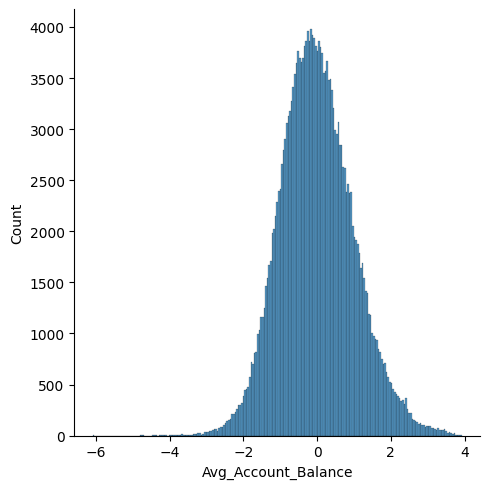

In [113]:
# We will confirm the new data is not skewed with plots

sns.displot(train_data_encoded['Avg_Account_Balance'])
plt.plot()

[]

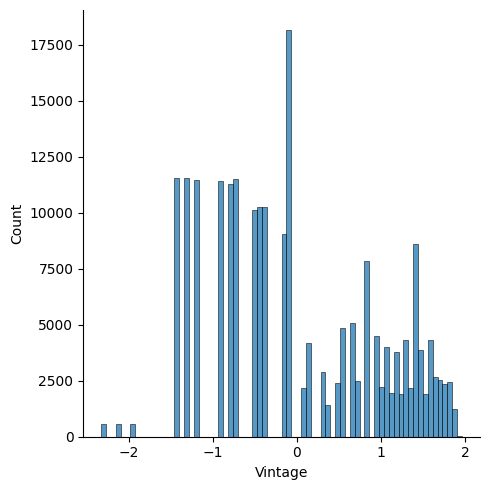

In [114]:
sns.displot(train_data_encoded['Vintage'])
plt.plot()